# Decay Minimization Notebook

The purpose of this notebook is to calculate the values of $c_\phi$ for a HPS mass point and $\theta$ value. The notebook also looks into the branching ratios of ALP decays, comparing leptonic and photonic decay modes, and plots the parentage of each scalar particle.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from particle import Particle

m_pi0 = Particle.from_pdgid(111).mass # MeV
m_p = Particle.from_pdgid(2212).mass # MeV
e = 1.6*10**-19

k_b = 1.38064852e-23
T = 2.73

E = k_b*T # J   
E = E/e *10 **-6# MeV

E_p = ((m_p + m_pi0)**2 - m_p**2)/(2*E) - E
print(E_p*10**6/10**20)

5.76272508609999


In [3]:
import os
import pwd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from particle import Particle
import uproot
from scipy import optimize
from scipy import constants
# hbar = constants.hbar


# hbar = 4.135667696e-21 # MeV⋅Hz−1
hbar = 6.58211899e-22 # MeV⋅s
import decay_widths as dw

# def get_username():
#     return pwd.getpwuid(os.getuid())[0]
# os.chdir("/uboone/data/users/{}/workdir/".format(get_username()))

root_dir = "/Users/user/PhD/HPS_uboone_analysis/"

LAMBDA = 1e6 # MeV, energy scale (1 TeV, used in https://arxiv.org/pdf/2202.03447.pdf)

In [ ]:
def parameter_optimization(x, theta, m_s):
    c_phi = np.abs(x)
    c_w = 0
    c_B = 0
    
    return (dw.decay_width_S_ee(theta,m_s) - dw.decay_width_a_yy(c_w,c_phi, c_B, m_s, LAMBDA) - dw.decay_width_a_ee(c_w,c_phi, c_B, m_s, LAMBDA))

def parameter_optimization(x, theta, m_s):
    tof = 1e-7
    m_a = m_s

    c_phi = np.abs(x)
    c_w = 0
    c_B = 0
    
    lambda_E = LAMBDA
    gamma_pi_a = dw.decay_width_pi_a(c_w, c_phi, c_B, m_a, lambda_E)
    gamma_pi_S = dw.decay_width_pi_S(theta, m_s)
    gamma_S = dw.decay_width_S_ee(theta, m_s)
    gamma_a = dw.decay_width_a_ee(c_w, c_phi, c_B, m_a, lambda_E) + dw.decay_width_a_yy(c_w, c_phi, c_B, m_a, lambda_E)
    gamma_a_ee = dw.decay_width_a_ee(c_w, c_phi, c_B, m_a, lambda_E)

    prod_ratio = gamma_pi_a/gamma_pi_S
    branching_ratio = gamma_a_ee/gamma_a
    
    return (gamma_a-gamma_S)/hbar

def get_reweighting(tof, m_s, theta, klong, starting_point = 1):
    m_a = m_s
    c_w = 0
    c_B = 0
    minimization = optimize.root(parameter_optimization, starting_point, args =(theta, m_s))
    # print(minimization)
    c_phi = minimization.x[0]
    rw = dw.reweighting(tof, m_s, theta, c_w, c_phi, c_B, klong=klong)

    lambda_E = LAMBDA
    gamma_pi_a = dw.decay_width_pi_a(c_w, c_phi, c_B, m_a, lambda_E)
    gamma_pi_S = dw.decay_width_pi_S(theta, m_s)

    gamma_pi0_a = dw.decay_width_pi0_a(c_w, c_phi, c_B, m_a, lambda_E)
    gamma_pi0_S = dw.decay_width_pi0_S(theta, m_s)

    gamma_S = dw.decay_width_S_ee(theta, m_s)
    gamma_a = dw.decay_width_a_ee(c_w, c_phi, c_B, m_a, lambda_E) + dw.decay_width_a_yy(c_w, c_phi, c_B, m_a, lambda_E)
    gamma_a_ee = dw.decay_width_a_ee(c_w, c_phi, c_B, m_a, lambda_E)

    diff_decay_width = (gamma_a-gamma_S)/hbar
    print(r"Decay width difference / hbar = {:.4} Hz".format(diff_decay_width))

    prod_ratio = gamma_pi_a/gamma_pi_S
    branching_ratio = gamma_a_ee/gamma_a
    return rw, c_phi



Decay width difference / hbar = 0.0 Hz
Mass = 100
Lepton decay width = 7.026257249727836e-18
 Photon decay width = 8.00048310149274e-19
c_phi = 0.002600598371080594
Reweighting = 0.08980966912688328

Decay width difference / hbar = -2.341e-12 Hz
Mass = 125
Lepton decay width = 3.5780139805416286e-18
 Photon decay width = 6.723169190186e-18
c_phi = 0.0016598666156847858
Reweighting = 0.01344357523060329

Decay width difference / hbar = 1.404e-11 Hz
Mass = 130
Lepton decay width = 1.1979910495579356e-18
 Photon decay width = 9.671717137074174e-18
c_phi = 0.0009418066292604386
Reweighting = 0.0013535630862040661

Decay width difference / hbar = 1.428e-10 Hz
Mass = 135
Lepton decay width = 2.8679636139611936e-23
 Photon decay width = 1.1451411186105015e-17
c_phi = 4.5219533631228575e-06
Reweighting = 6.989339835089079e-13

Decay width difference / hbar = -4.471e-10 Hz
Mass = 140
Lepton decay width = 1.1836988683681759e-18
 Photon decay width = 1.0905718609466063e-17
c_phi = 0.0009021158357

/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_67415/3814511701.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


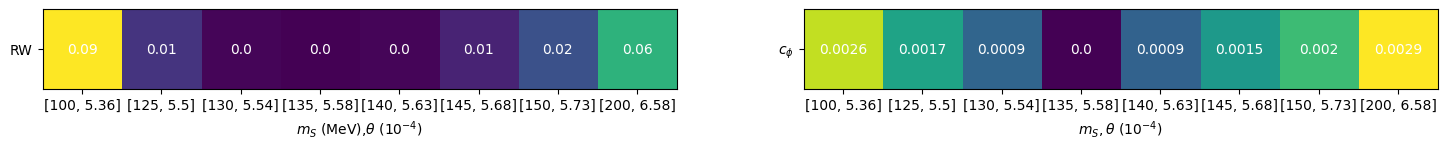

In [5]:
mass_theta_pairs = [[100,5.36],[125,5.5],[130,5.54],[135,5.58],[140,5.63],[145,5.68],[150,5.73],[200,6.58]]
mass_c_phi_pairs = [[100, 0.0021511675963086668], [125, 0.00174771688348354], [130, 0.0013395476017277362], [135, 0.0006894494303977418], [140, 6.221489827671513e-05], [145, 0.0006895662581147245],[150, 0.001121544527075756], [200, 0.0022345296055744303]]
rw_matrix = []
wilson_phi_array = []
 
klong = True

for i, [mass_S, theta] in enumerate(mass_theta_pairs):
    theta = theta*10**-4
    temp = []
    mass_a = mass_S
    tof = 1e-7
    rw, c_phi = get_reweighting(tof, mass_S, theta, klong, starting_point=mass_c_phi_pairs[i][1])
    print(f"Mass = {mass_a}")


    gamma_S = dw.decay_width_S_ee(theta, mass_S)
    gamma_ll = dw.decay_width_a_ee(0, c_phi, 0, mass_a, LAMBDA)
    gamma_yy = dw.decay_width_a_yy(0, c_phi, 0, mass_a, LAMBDA)
    gamma_a = gamma_ll + gamma_yy
    print(f"Lepton decay width = {gamma_ll}\n Photon decay width = {gamma_yy}")
    print(f"c_phi = {c_phi}")
    print(f"Reweighting = {rw}")
    print()
    wilson_phi_array.append([mass_S,c_phi])
    rw_matrix.append([rw,c_phi])

rw_rounded = np.round(np.asarray([rw_matrix])[:,:,0], decimals=2)

fig, ax = plt.subplots(1,2,figsize=(18, 8))

ax[0].set_xticks(np.arange(len(mass_theta_pairs)), labels=mass_theta_pairs)
ax[0].set_yticks(np.arange(1), labels=['RW'])

ax[1].set_xticks(np.arange(len(mass_theta_pairs)), labels=mass_theta_pairs)
ax[1].set_yticks(np.arange(1), labels=[r'$c_\phi$'])

im0 = ax[0].imshow(np.asarray([rw_matrix])[:,:,0])
im1 = ax[1].imshow(np.asarray([rw_matrix])[:,:,1])

for i in range(1):
    for j in range(len(mass_theta_pairs)):
        text = ax[0].text(j, i, rw_rounded[i, j],
                       ha="center", va="center", color="w")

cphi_rounded = np.round(np.asarray([rw_matrix])[:,:,1], decimals=4)

for i in range(1):
    for j in range(len(mass_theta_pairs)):
        text = ax[1].text(j, i, cphi_rounded[i, j],
                       ha="center", va="center", color="w")

ax[0].set(xlabel=r"$m_S$ (MeV),$\theta$ ($10^{-4}$)") 
ax[1].set(xlabel=r"$m_S,\theta$ ($10^{-4}$)") 
fig.show()


In [6]:
rw_matrix

[[0.08980966912688328, 0.002600598371080594],
 [0.01344357523060329, 0.0016598666156847858],
 [0.0013535630862040661, 0.0009418066292604386],
 [6.989339835089079e-13, 4.5219533631228575e-06],
 [0.0010682737022425595, 0.0009021158357262145],
 [0.00898065285131052, 0.0015497404985992513],
 [0.02230324274170619, 0.0019625948179189537],
 [0.05805900868373449, 0.002862724308992461]]

## Comparing the decay widths of ${K_L}$ and $K^{+(-)}$
for axion like particles and Higgs portal scalars.

In [10]:
for i, [mass_S, theta] in enumerate(mass_theta_pairs):
    theta = theta*10**-4
    mass_a = mass_S
    tof = 1e-7
    c_w = 0
    c_B = 0
    c_phi = wilson_phi_array[i][1]
    lambda_E = LAMBDA

    gamma_pi_a = dw.decay_width_pi_a(c_w, c_phi, c_B, mass_a, lambda_E)
    gamma_pi0_a = dw.decay_width_pi0_a(c_w, c_phi, c_B, mass_a, lambda_E)

    gamma_pi_S = dw.decay_width_pi_S(theta, mass_S)
    gamma_pi0_S = dw.decay_width_pi0_S(theta, mass_S)

    gamme_kshort_a = dw.decay_width_kShort_a(c_w, c_phi, c_B, mass_a, lambda_E)

    gamma_S = dw.decay_width_S_ee(theta, mass_S)
    gamma_ll = dw.decay_width_a_ee(0, c_phi, 0, mass_a, LAMBDA)
    gamma_yy = dw.decay_width_a_yy(0, c_phi, 0, mass_a, LAMBDA)
    gamma_a = gamma_ll + gamma_yy

    prod_ratio = gamma_pi_a/gamma_pi_S

    prod_ratio_pi0 = gamma_pi0_a/gamma_pi0_S

    branching_ratio = gamma_ll/gamma_a

    rw = branching_ratio*np.exp((gamma_a-gamma_S)/hbar)*prod_ratio
    rw_pi0 = branching_ratio*np.exp((gamma_a-gamma_S)/hbar)*prod_ratio_pi0
    print()
    print('K+(-)/K long, HPS: {:.3}'.format(gamma_pi_S/gamma_pi0_S))
    print()
    print('K+(-)/K long, ALP: {:.3}'.format(gamma_pi_a/gamma_pi0_a))
    print('K short/K long,  ALP: {:.3}'.format(gamme_kshort_a/gamma_pi0_a))
    print('K short/K+(-), ALP: {:.3}'.format(gamme_kshort_a/gamma_pi_a))
    print()




K+(-)/K long, HPS: 0.968

K+(-)/K long, ALP: 6.73
K short/K long,  ALP: 5.88
K short/K+(-), ALP: 0.874


K+(-)/K long, HPS: 0.967

K+(-)/K long, ALP: 6.72
K short/K long,  ALP: 5.88
K short/K+(-), ALP: 0.875


K+(-)/K long, HPS: 0.966

K+(-)/K long, ALP: 6.72
K short/K long,  ALP: 5.88
K short/K+(-), ALP: 0.876


K+(-)/K long, HPS: 0.966

K+(-)/K long, ALP: 6.71
K short/K long,  ALP: 5.88
K short/K+(-), ALP: 0.876


K+(-)/K long, HPS: 0.966

K+(-)/K long, ALP: 6.71
K short/K long,  ALP: 5.88
K short/K+(-), ALP: 0.876


K+(-)/K long, HPS: 0.965

K+(-)/K long, ALP: 6.71
K short/K long,  ALP: 5.88
K short/K+(-), ALP: 0.877


K+(-)/K long, HPS: 0.965

K+(-)/K long, ALP: 6.71
K short/K long,  ALP: 5.88
K short/K+(-), ALP: 0.877


K+(-)/K long, HPS: 0.959

K+(-)/K long, ALP: 6.67
K short/K long,  ALP: 5.88
K short/K+(-), ALP: 0.882



## ALP branching ratios as a function of ALP mass

/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_37350/1102481921.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize= size)
/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_37350/1102481921.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize= size)


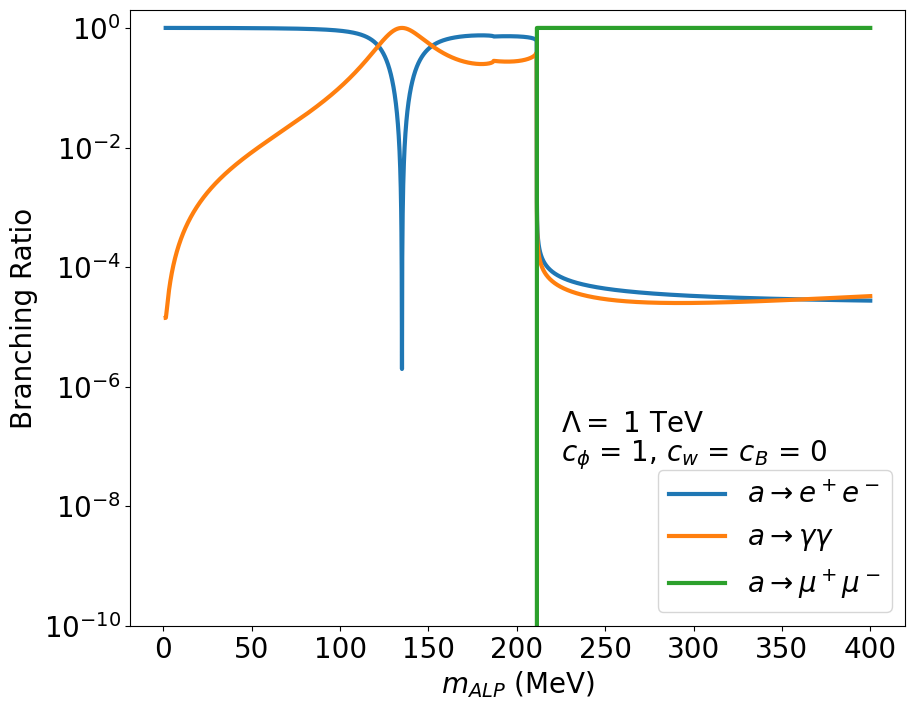

In [12]:
masses = np.linspace(np.log10(2.5*dw.m_e), np.log10(400), 10000)
masses = 10**masses

# masses = np.linspace(0.1, np.log10(400), 100000)
# masses = 10**masses

c_w = 0
c_phi = 1
c_B = 0

gamma_ee = np.asarray([dw.decay_width_a_ee(c_w, c_phi, c_B, mass, LAMBDA) for mass in masses])
gamma_yy = np.asarray([dw.decay_width_a_yy(c_w, c_phi, c_B, mass, LAMBDA) for mass in masses])
gamma_mumu = np.asarray([dw.decay_width_a_mumu(c_w, c_phi, c_B, mass, LAMBDA) for mass in masses])

fig_y = 8
fig_x = 10

size = 20

fig, ax = plt.subplots(figsize=(fig_x,fig_y))

# ax.set_ylim(1e-5,2)
ax.plot(masses, gamma_ee/(gamma_ee+gamma_yy+gamma_mumu), label=r'$a \rightarrow e^+e^-$', linewidth=3)
ax.plot(masses, gamma_yy/(gamma_ee+gamma_yy+gamma_mumu), label=r"$a \rightarrow \gamma\gamma$", linewidth=3)
ax.plot(masses, gamma_mumu/(gamma_ee+gamma_yy+gamma_mumu), label=r"$a \rightarrow \mu^+\mu^-$", linewidth=3)

# ax.plot([2*dw.m_e,2*dw.m_e],[0,2], 'b--', label=r'$2m_e$')
# ax.plot([2*dw.m_mu,2*dw.m_mu],[0,2], 'r--', label=r'$2m_\mu$')

# Params for c_W = 1

if c_w == 1 and c_phi == 0 and c_B == 0:
    y_lims = [1e-7,2]
    ax.set_ylim(y_lims[0],y_lims[1])

    log_ylims = np.log10(y_lims)
    pos_1 = 0.675*log_ylims[0]
    pos_2 = 0.725*log_ylims[0]

    ax.text(225,10**pos_1, rf'$\Lambda=$ 1 TeV',fontsize=size)
    ax.text(225,10**pos_2,  rf"$c_w$ =" " {}".format(c_w)+','+ rf"$ c_\phi$ = $c_B$ =" " {}".format(c_B),fontsize=size)

# Params for c_phi = 1
if c_phi == 1 and c_w == 0 and c_B == 0:
    y_lims = [1e-10,2]
    ax.set_ylim(y_lims[0],y_lims[1])

    log_ylims = np.log10(y_lims)
    pos_1 = 0.675*log_ylims[0]
    pos_2 = 0.725*log_ylims[0]

    ax.text(225,10**pos_1, rf'$\Lambda=$ 1 TeV',fontsize=size)
    ax.text(225,10**pos_2, rf"$c_\phi$ =" " {}".format(c_phi)+','+ rf" $c_w$ = $c_B$ =" " {}".format(c_B),fontsize=size)
    ax.set_ylabel('Branching Ratio',fontsize=size)

# ax.set_xlim(0,np.max(masses))

ax.legend(loc='lower right',fontsize=size) #, title = '$f_a =$ 1 TeV' + '\n' + rf"$c_\phi$ =" " {}".format(c_phi)+','+ rf" $c_w$ =" " {}".format(c_w)+','+ rf" $c_B$ =" " {}".format(c_B))
ax.set_xlabel(r'$m_{ALP}$ (MeV)',fontsize=size)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(),fontsize= size)
ax.set_yticklabels(ax.get_yticklabels(),fontsize= size)

parameters = [['c_w', c_w], ['c_phi', c_phi], ['c_B', c_B]]

scenario = ''
for name, parameter in parameters:
    if parameter != 0:
        scenario += '_{}'.format(name)        
fig.savefig('plots/branching_ratio{}.png'.format(scenario), dpi=300)
fig.savefig('plots/branching_ratio{}.pdf'.format(scenario), dpi=300)

### Decay widths

/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_37350/4046982999.py:105: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize= size)
/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_37350/4046982999.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize= size)


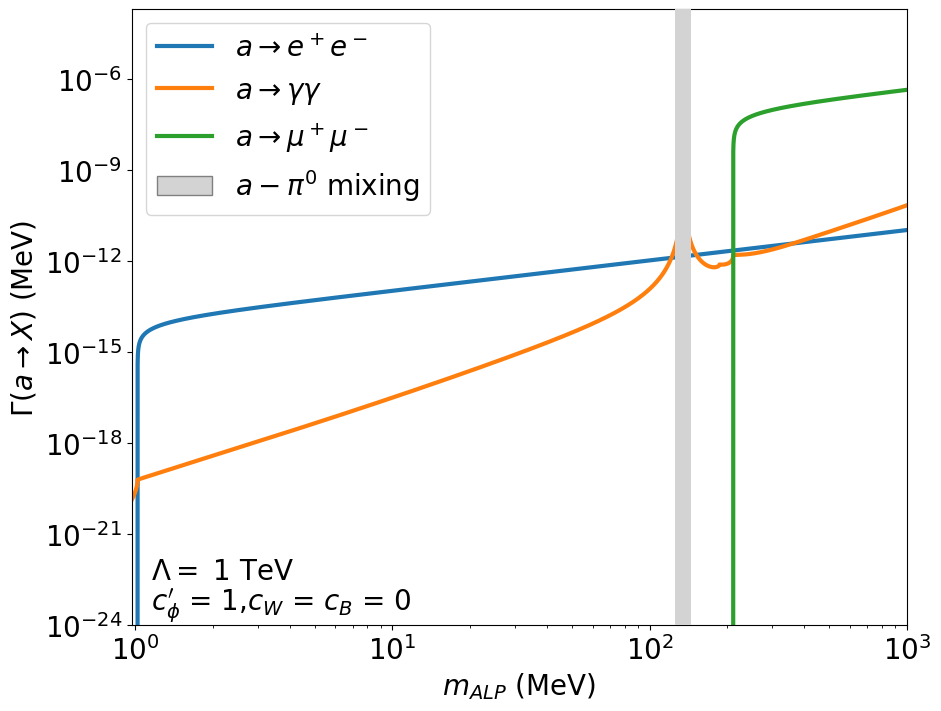

In [13]:
masses = np.linspace(np.log10(1.9*dw.m_e), 3, 10000)
masses = 10**masses

c_w = 0
c_phi = 1
c_B = 0

f_a = 1*LAMBDA

gamma_ee = np.asarray([dw.decay_width_a_ee(c_w, c_phi, c_B, mass, f_a) for mass in masses])
gamma_yy = np.asarray([dw.decay_width_a_yy(c_w, c_phi, c_B, mass, f_a) for mass in masses])
gamma_mumu = np.asarray([dw.decay_width_a_mumu(c_w, c_phi, c_B, mass, f_a) for mass in masses])

fig_y = 8
fig_x = 10

size = 20

fig, ax = plt.subplots(figsize=(fig_x,fig_y))

# ax.set_ylim(1e-5,2)
ax.plot(masses, gamma_ee, label=r'$a \rightarrow e^+e^-$', linewidth=3)
ax.plot(masses, gamma_yy, label=r"$a \rightarrow \gamma\gamma$", linewidth=3)
ax.plot(masses, gamma_mumu, label=r"$a \rightarrow \mu^+\mu^-$", linewidth=3)

# gamma_yy_tree = np.asarray([dw.decay_width_a_yy_tree(c_w, c_phi, c_B, mass, f_a) for mass in masses])
# ax.plot(masses, gamma_yy_tree, label=r"$a \rightarrow \gamma\gamma$ tree", linewidth=3)

# ax.plot([2*dw.m_e,2*dw.m_e],[0,2], 'b--', label=r'$2m_e$')
# ax.plot([2*dw.m_mu,2*dw.m_mu],[0,2], 'r--', label=r'$2m_\mu$')

# Params for c_W = 1
y_lims = [1e-24,1e-4]
ax.set_ylim(y_lims[0],y_lims[1])
if c_phi == 0 and c_B == 0:
    y_lims = [1e-24,1e-4]
    ax.set_ylim(y_lims[0],y_lims[1])

    log_xlims = np.log10(masses)
    mass_range = np.max(log_xlims) - np.min(log_xlims)

    pos_x_1 = 0.025*mass_range + np.min(log_xlims)
    pos_x_2 = 0.025*mass_range + np.min(log_xlims)

    log_ylims = np.log10(y_lims)
    mass_range = np.max(log_ylims) - np.min(log_ylims)

    pos_y_1 = 0.075*mass_range + np.min(log_ylims)
    pos_y_2 = 0.025*mass_range + np.min(log_ylims)

    # arr = np.loadtxt('/Users/user/PhD/ALPs/limits/c_W_had.csv', delimiter=',')
    # mass = arr[:,0]*1000
    # mass = [mass[0]] + list(mass)
    # gamma_had = arr[:,1]*100
    # gamma_had = [0] + list(gamma_had)
    # ax.plot(mass, gamma_had, label=r"$a \rightarrow$ hadrons", linewidth=3)

    ax.text(10**pos_x_1,10**pos_y_1, rf'$\Lambda=$ 1 TeV',fontsize=size)
    ax.text(10**pos_x_2,10**pos_y_2,  rf"$c_W$ =" " {}".format(c_w)+','+ rf"$ c_\phi$ = $c_B$ =" " {}".format(c_B),fontsize=size)

# Params for c_phi = 1
if c_w == 0 and c_B == 0:
    y_lims = [1e-24,2e-4]
    ax.set_ylim(y_lims[0],y_lims[1])

    log_xlims = np.log10(masses)
    mass_range = np.max(log_xlims) - np.min(log_xlims)

    pos_x_1 = 0.025*mass_range + np.min(log_xlims)
    pos_x_2 = 0.025*mass_range + np.min(log_xlims)

    log_ylims = np.log10(y_lims)
    mass_range = np.max(log_ylims) - np.min(log_ylims)

    pos_y_1 = 0.075*mass_range + np.min(log_ylims)
    pos_y_2 = 0.025*mass_range + np.min(log_ylims)

    # arr = np.loadtxt('/Users/user/PhD/ALPs/limits/c_phi_had.csv', delimiter=',')
    # mass = arr[:,0]*1000
    # mass = [mass[0]] + list(mass)
    # gamma_had = arr[:,1]*1000
    # gamma_had = [0] + list(gamma_had)
    # ax.plot(mass, gamma_had, label=r"$a \rightarrow$ hadrons", linewidth=3)
    ax.text(10**pos_x_1,10**pos_y_1, rf'$\Lambda=$ 1 TeV',fontsize=size)
    ax.text(10**pos_x_2,10**pos_y_2,  rf"$c_\phi'$ =" " {}".format(c_phi)+','+ rf"$ c_W$ = $c_B$ =" " {}".format(c_B),fontsize=size)

if c_phi != 0:
    rect = patches.Rectangle((125,1.01*y_lims[0]),20,0.99*y_lims[-1],facecolor='lightgrey',fill=True,zorder=20, edgecolor='grey', ls='', label=rf'$a-\pi^0$ mixing' )
    ax.add_patch(rect)








ax.set_xscale('log')

ax.set_xlim(np.min(masses),np.max(masses))
ax.legend(loc='upper left',fontsize=size) #, title = '$f_a =$ 1 TeV' + '\n' + rf"$c_\phi$ =" " {}".format(c_phi)+','+ rf" $c_w$ =" " {}".format(c_w)+','+ rf" $c_B$ =" " {}".format(c_B))
ax.set_xlabel(r'$m_{ALP}$ (MeV)',fontsize=size)
ax.set_ylabel(r'$\Gamma(a\rightarrow X)$ (MeV)',fontsize=size)
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(),fontsize= size)
ax.set_yticklabels(ax.get_yticklabels(),fontsize= size)

parameters = [['c_w', c_w], ['c_phi', c_phi], ['c_B', c_B]]

scenario = ''
for name, parameter in parameters:
    if parameter != 0:
        scenario += '_{}'.format(name)        
fig.savefig('plots/decay_width{}.png'.format(scenario), dpi=300)
fig.savefig('plots/decay_width{}.pdf'.format(scenario), dpi=300)

In [15]:
m_u = Particle.from_pdgid(2).mass
m_d = Particle.from_pdgid(1).mass 
m_c = Particle.from_pdgid(4).mass # +- 22 MeV, https://pdglive.lbl.gov/DataBlock.action?node=Q004M
m_s = Particle.from_pdgid(3).mass # +- 2 MeV, https://pdglive.lbl.gov/DataBlock.action?node=Q004M
m_b = Particle.from_pdgid(5).mass  # +30,-20 MeV, https://pdglive.lbl.gov/Particle.action?node=Q005
m_t = Particle.from_pdgid(6).mass  # +- 300 MeV, https://pdglive.lbl.gov/Particle.action?node=Q007
m_Z = Particle.from_pdgid(23).mass  # +- 2.0 MeV, https://pdglive.lbl.gov/Particle.action?node=S043
m_W = Particle.from_pdgid(24).mass  # +- 12 MeV https://pdglive.lbl.gov/Particle.action?node=S043
m_pi = Particle.from_pdgid(211).mass  # +- 0.00018 MeV https://pdglive.lbl.gov/Particle.action?node=S008
m_pi0 = Particle.from_pdgid(111).mass  # +- 0.00018 MeV https://pdglive.lbl.gov/Particle.action?node=S008
m_K = Particle.from_pdgid(321).mass   # +- 0.016 MeV https://pdglive.lbl.gov/Particle.action?node=S010
m_K0 = Particle.from_pdgid(130).mass   # +- 0.016 MeV https://pdglive.lbl.gov/Particle.action?node=S010


pdg_id = [1,2,3,4,5,6,11,23,24,211,111,321,130]

for id in pdg_id:

    p = Particle.from_pdgid(id)
    print(f"Mass of {p.name} = {p.mass} MeV")


Mass of d = 4.67 MeV
Mass of u = 2.16 MeV
Mass of s = 93.4 MeV
Mass of c = 1270.0 MeV
Mass of b = 4180.0 MeV
Mass of t = 172500.0 MeV
Mass of e- = 0.51099895 MeV
Mass of Z0 = 91187.6 MeV
Mass of W+ = 80377.0 MeV
Mass of pi+ = 139.57039 MeV
Mass of pi0 = 134.9768 MeV
Mass of K+ = 493.677 MeV
Mass of K(L)0 = 497.611 MeV


/Users/user/miniconda3/envs/HPS/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/user/miniconda3/envs/HPS/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


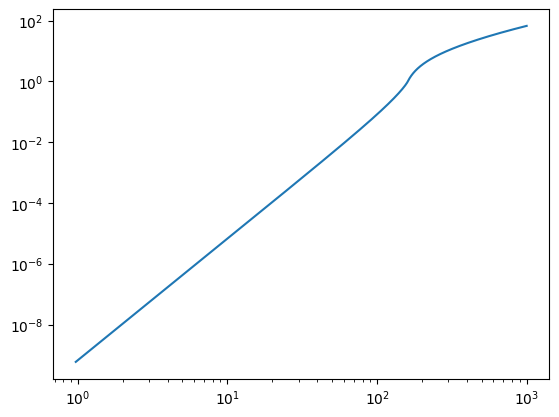

In [16]:
B_0 = []
for mass in masses*1000:
    tau_W = dw.tau_p(dw.m_W, mass)

    coeff = dw.B_2(tau_W)
    coeff = coeff*np.conjugate(coeff)
    B_0.append(coeff)

plt.plot(masses, B_0)
plt.yscale('log')
plt.xscale('log')

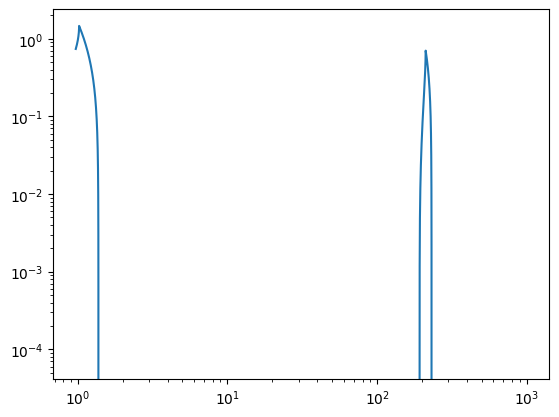

In [17]:
B_0 = []
for mass in masses:
    tau_W = dw.tau_p(dw.m_W, mass)

    coeff = dw.B_0(mass) #+ mass**2/(dw.m_pi0**2 - mass**2)

    B_0.append(coeff)

plt.plot(masses, B_0)
plt.yscale('log')
plt.xscale('log')

## Plotting the parentage of the scalars

Easier method first: **HPS** (because we can compare to existing plots!)

In [15]:
def SF_times_weights_sample_names(sample_dict):
    """
    Returns the scaling object for the samples, used when saving the BDT output. 
    """
    SF = np.ones(len(sample_dict["pred"]))*(sample_dict['scale_factor_ls'])
    return SF

def make_stat_err_new(var, bins, weights_times_SF): 
    hist_squared = np.histogram(var,bins=bins,weights=weights_times_SF**2)[0]
    stat_err=np.sqrt(hist_squared)
    return stat_err

def split_sample_by_parent(sample, key):

    sample_K_long = sample[sample[key] == 130]
    sample_Kplus = sample[sample[key] == 321]
    sample_Kminus = sample[sample[key] == -321]

    return sample_K_long, sample_Kplus, sample_Kminus


In [16]:
def split_sample_by_parent(sample, key):

    sample_K_long = sample[sample[key] == 130]
    sample_Kplus = sample[sample[key] == 321]
    sample_Kminus = sample[sample[key] == -321]

    return sample_K_long, sample_Kplus, sample_Kminus


In [17]:
def compare_angles(run, HNL_mass, bin_num=100, use_weights=True, kaon = ['KDIF','KDAR']):
    theta_dict = {
        100: 5.36,
        125: 5.5,
        130: 5.54,
        135: 5.58,
        140: 5.63,
        145: 5.68,
        150: 5.73,
        200: 6.58
        }
    
    theta = theta_dict[HNL_mass]

    if run == 1:
        OnBeam_tortgt_wcut = 2.002e20
        root_string = 'Final_v51_FHC/sfn_numi_fhc_generic'
    elif run == 3:
        OnBeam_tortgt_wcut = 1.6e20
        root_string = 'Final_v51_FHC/sfn_numi_rhc_generic'
    else:
        print("Invalid run number")

    horn_current = "fhc"

    parent_label = "mc_primary_pdg_ls" # "nu_parent_pdg_ls" or "mc_primary_pdg_ls"

    loc_hists = root_dir +'BDT_inputs_pkl/'
    filenames = ".pkl"

    shr = "1shr"
    K = "KDIF"
    name_ends = f"{K}_{HNL_mass}_{shr}"

    root_file = uproot.open(root_dir+root_string+f"_{HNL_mass}_ppfx_CV_train.root")['nuselection']
    root_keys = root_file['NeutrinoSelectionFilter;1'].keys()

    # for key in root_keys:
    #     if 'shr_' in key:
    #           print(key)

    # for key in root_keys:
    #     if 'mc_' in key:
    #           print(key)

    hist_dict_run1, hist_dict_run3, theta_dict = {}, {}, {}

    showers = ['1shr','2shr']

    hist_dict  = {}

    keys_arr = []
    # ['KDIF_100_1shr', 'KDIF_100_2shr','KDAR_100_1shr','KDAR_100_2shr']

    for shr in showers:
                for K in kaon:
                    
                    keys_arr.append(f"{K}_{HNL_mass}_{shr}")
                    
                    name_ends = f"{K}_{HNL_mass}_{shr}"
                    hist_dict[name_ends] = pd.read_pickle(loc_hists+f'AllVar_Selected_Run{run}_NuMI_Signal_{name_ends}' + '_PPFX_pred_NEW' + filenames)

    samples = [pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]

    norm_factor = 0

    for key in keys_arr:  
        sample_dict = hist_dict[key]

        frac_sig_test_sample = len(sample_dict.query('is_trained == 0'))/len(sample_dict)
        sample_dict['frac_test_sample'] = frac_sig_test_sample #Should be 0.4

        sample_dict.eval('scale_factor_ls = (1/frac_test_sample)*KDAR_scale*'+str(OnBeam_tortgt_wcut)+'/test_sample_POT_ls',inplace=True)

        sample_K_long, sample_Kplus, sample_Kminus = split_sample_by_parent(sample_dict, key=parent_label)
        
        samples[0] = pd.concat([samples[0],sample_Kplus])
        samples[1] = pd.concat([samples[1],sample_K_long])
        samples[2] = pd.concat([samples[2],sample_Kminus])
        if use_weights == True:
            norm_factor +=  sample_dict['scale_factor_ls'].sum()
        else:
            norm_factor +=  len(sample_dict)

    labels = ['K plus', 'K long', 'K minus']

    angle_weights_arr = []

    for i, label in enumerate(labels):
        print(label)
        sample = samples[i]

        indices = dw.match_RSE_indices(sample, root_file)

        theta = root_file['NeutrinoSelectionFilter;1']['shr_theta'].array()[indices]


        if len(theta)>0:
            

            shr_px = root_file['NeutrinoSelectionFilter;1']['mc_px'].array()[indices]
            shr_py = root_file['NeutrinoSelectionFilter;1']['mc_py'].array()[indices]
            shr_pz = root_file['NeutrinoSelectionFilter;1']['mc_pz'].array()[indices]

            
            shr_px = shr_px[:,0] + shr_px[:,1]
            shr_py = shr_py[:,0] + shr_py[:,1]
            shr_pz = shr_pz[:,0] + shr_pz[:,1]

            # mc_px = sample['mc_primary_px_ls']
            # mc_py = sample['mc_primary_py_ls']
            # mc_pz = sample['mc_primary_pz_ls']
            p_vec = np.array([shr_px,shr_py,shr_pz]).T
            # p_vec = np.array([mc_px,mc_py,mc_pz]).T
            

            p_vec = p_vec/np.linalg.norm(p_vec,axis=1)[:,None]
            

            bnb_vector = np.array([0,0,1])
            bnb_vector_arr = np.tile(bnb_vector, (len(p_vec),1))


            cos_theta = np.einsum('ij,ij->i', p_vec, bnb_vector_arr) 
            theta = np.arccos(cos_theta)


            weights_arr = SF_times_weights_sample_names(sample)

            angle_weights_arr.append([np.rad2deg(theta) , weights_arr])
        else:
            angle_weights_arr.append([[],[]])

        
    fig, ax = plt.subplots(1,1,figsize=(6, 4), dpi=150)

    bin_arr = np.linspace(20,140,bin_num)

    colours = ['green', 'blue', 'magenta']
    bottom = np.zeros(len(bin_arr)-1)
    
    percentage_arr = []
    total = len(angle_weights_arr[0][0]) + len(angle_weights_arr[1][0]) + len(angle_weights_arr[2][0])
    for i, [angle, weights] in enumerate(angle_weights_arr):
        if use_weights == False:
            weights = np.ones_like(weights)
        percentage = np.sum(weights)/norm_factor
        percentage_arr.append(percentage)
        print(f"Percentage of {labels[i]} = {percentage}")
    #     ax.hist(angle, bins=bin_arr, weights=weights, histtype='step', label=labels[i], linewidth=2, color=colours[i], density=True, stacked=True)


    if len(angle_weights_arr[2][0])>0:

        if use_weights == True:
             weights = angle_weights_arr[2][1]/norm_factor
        else:
             weights = np.ones_like(angle_weights_arr[2][1])/norm_factor

        k_minus_hist, bin_edges = np.histogram(angle_weights_arr[2][0], bins=bin_arr, weights=weights, density=False)
        ax.bar(bin_edges[:-1], k_minus_hist, bottom=bottom,  width=bin_arr[1]-bin_arr[0], alpha=0.5, label='K minus', color='magenta')
        bottom += k_minus_hist
    if len(angle_weights_arr[1][0])>0:
        
        if use_weights == True:
             weights = angle_weights_arr[1][1]/norm_factor
        else:
             weights = np.ones_like(angle_weights_arr[1][1])/norm_factor
        
        k_long_hist, bin_edges = np.histogram(angle_weights_arr[1][0], bins=bin_arr, weights=weights, density=False)
        ax.bar(bin_edges[:-1], k_long_hist, bottom=bottom,  width=bin_arr[1]-bin_arr[0], alpha=0.5, label='K long', color='blue')
        bottom += k_long_hist
    if len(angle_weights_arr[0][0])>0:
        
        if use_weights == True:
             weights = angle_weights_arr[0][1]/norm_factor
        else:
             weights = np.ones_like(angle_weights_arr[0][1])/norm_factor

        k_plus_hist, bin_edges = np.histogram(angle_weights_arr[0][0], bins=bin_arr, weights=weights, density=False)
        ax.bar(bin_edges[:-1], k_plus_hist, bottom=bottom, width=bin_arr[1]-bin_arr[0], alpha=0.5, label='K plus', color='green')
        bottom += k_plus_hist
    
    title = f'Parent particle angular distribution, run {run}'
    i = 0
    for k in kaon:
        if i == 1:
            title += f' and  {k}'
        else:
            title += f', {k}'
        i += 1

    ax.set_title(title)
    ax.set_yscale('log')
    ax.set_xlabel(r'Angle relative to the BNB (deg)',fontsize=20)
    ax.set_ylim(1e-5,1)
    ax.set_xlim(20,140)
    ax.legend()
    fig.show()

    return bottom, bin_edges
    

In [18]:
kaons = [['KDIF'],['KDAR']]
runs = [1,3]

product_dict = {}

for run in runs:
    for kaon in kaons:
        
        hist, bin_edges = compare_angles(run=run, HNL_mass=100, bin_num=120, use_weights=False, kaon = kaon)
        product_dict[f'{run}_{kaon[0]}'] = [hist, bin_edges]


    kaons_arr = [kaon[0] for kaon in kaons]
    compare_angles(run=run, HNL_mass=100, bin_num=120, use_weights=False, kaon = kaons_arr)

K plus
K long


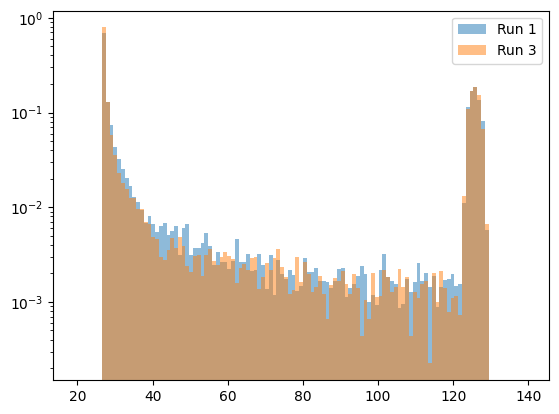

In [ ]:
for run in runs:
    hist_arr = np.zeros_like(bin_edges[:-1])
    for kaon in kaons:
        key = f'{run}_{kaon[0]}'
        hist, bin_edges = product_dict[key]
        hist_arr += hist

    
    plt.bar(bin_edges[:-1], hist_arr, width=bin_edges[1]-bin_edges[0], alpha=0.5, label=f'Run {run}')    
plt.legend()
plt.yscale('log')
plt.show()